<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/M2/Curso_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga información de Github

In [1]:
try:
    !rm -rf CursoDF
except:
    print("No existe la ruta aún")

!git clone "https://github.com/pikey-msc/CursoDF"

Cloning into 'CursoDF'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


#Carga de librerías

In [0]:
#Cargar módulo de R en Python
%load_ext rpy2.ipython

In [91]:
#Cargar librerías de R
%%R
install.packages("quantmod")
library(quantmod)
install.packages("asbio")
library(asbio)
install.packages("DescTools")
library(DescTools)
install.packages("DataExplorer")
library(DataExplorer)
install.packages("corrplot")
library("corrplot")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/quantmod_0.4-15.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 150327 bytes (146 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6

#Análisis Exploratorio de datos

## Estimadores estadísticos
### Estadística básica
Uso de la función `summary(x)` devuelve los siguientes valores de un conjunto de datos numéricos:\
1. Mínimo 
2. Cuantil al 25% o primer cuartil: $\textbf{P}(x\le q_{25\%})\leq 25\%$ ó $\textbf{P}(x\geq q_{25\%})\geq 1 - 25\%$
3. Mediana o cuantil al 50%: $\textbf{P}(x\le q_{50\%})\leq 50\%$ ó $\textbf{P}(x\geq q_{50\%})\geq 1 - 50\%$
4. Promedio $\sum_{i=1}^n \frac{x}{n}$
5. Cuantil a 75% o tercer cuartil:  $\textbf{P}(x\le q_{75\%})\leq 75\%$ ó $\textbf{P}(x\geq q_{75\%})\geq 1 - 75\%$
6. Máximo

Si los datos son de tipo caracter devuelve lo siguiente:
1. Longitud: Número de casos
2. Class: Tipo valores de clase
3. Mode: Tipo de valor

In [6]:
%%R
# plot  points  lines

today <- Sys.Date()
three_months_ago <- seq(today, length = 2, by = "-3 months")[2]

#Creación del objeto para guardar los datos
dataEnv<-new.env()
getSymbols.yahoo(c("WALMEX.MX","GCARSO.MX"), env=dataEnv, from = three_months_ago, to = today)

Datos=as.data.frame(dataEnv$`WALMEX.MX`)
Datos$Cambio="Igual"
#dataEnv$`WALMEX.MX`$Cambio="Igual"
for (i in (1:nrow(Datos)))
{
Datos$Cambio[i] = ifelse(Datos$WALMEX.MX.Close[i] >=Datos$WALMEX.MX.Open[i], "Subió", "Bajó")
}

print(tail(Datos))
summary(Datos)

           WALMEX.MX.Open WALMEX.MX.High WALMEX.MX.Low WALMEX.MX.Close
2019-11-06          56.44          57.54         56.22           57.46
2019-11-07          57.35          57.35         56.16           56.57
2019-11-08          56.52          56.79         56.07           56.19
2019-11-11          56.11          56.19         54.82           54.95
2019-11-12          55.00          55.12         54.06           54.12
2019-11-13          54.01          54.96         54.00           54.16
           WALMEX.MX.Volume WALMEX.MX.Adjusted Cambio
2019-11-06         20740018              57.46  Subió
2019-11-07         20535494              56.57   Bajó
2019-11-08         10308005              56.19   Bajó
2019-11-11         19525551              54.95   Bajó
2019-11-12         29535587              54.12   Bajó
2019-11-13         12112512              54.16  Subió
 WALMEX.MX.Open  WALMEX.MX.High  WALMEX.MX.Low   WALMEX.MX.Close
 Min.   :54.01   Min.   :54.96   Min.   :54.00   Min.   :54.

### Medidas estadísticas más comunes
Estadísticos insesgados:
1. Promedio: $\bar{x}=\sum_{i=1}^n \frac{x}{n}$
2. Desviación estándar  $\hat{\sigma}=\sqrt{\frac{\sum_{i=1}^n(x-\bar{x})^2}{n-1}}$
3. Varianza: $\hat{\sigma}^2=\frac{\sum_{i=1}^n(x-\bar{x})^2}{n-1}$
3. Asimetría: $\hat{\tau}=\frac{n}{(n-2)(n-1)}\frac{\sum_{i=1}^n(x_i-\bar{x})^3}{\hat{\sigma}^3}$
4. Curtosis: $\hat{\kappa}=\frac{n(n+1)}{(n-1)(n-2)(n-3)}\frac{\sum_{i=1}^n(x_i-\bar{x})^4}{\hat{\sigma}^4}-\frac{3(n-1)^2}{(n-2)(n-3)}$
5. $k$-ésimo momento: $\mu_k=\sum_{i=1}^n(x-\bar{x})^k\textbf{P}(x\le q_{\alpha\%})$
5. Cuantil:  $\textbf{P}(x\le q_{\alpha\%})\leq \alpha\%$ ó $\textbf{P}(x\geq q_{\alpha\%})\geq 1 - \alpha\%$
6. Promedio de colas (<<*Expected shortfall*>>): $\textbf{E}(x|x<q_\alpha)$\

Para todo $\alpha \in [0,1]$ y $n$ es el número de observaciones, $\textbf{P}(\cdot)$ es la probabilidad, y la $E(\cdot)$ es la esperanza matemática.



In [75]:
%%R
nt=nrow(Datos)
Datos$delta=as.matrix(c(0,Datos$WALMEX.MX.Close[2:nt]/Datos$WALMEX.MX.Close[1:(nt-1)]-1))
print(tail(Datos))
#print(tail(Datos_delta))

n=nt
#estadístico y comprobación
mean=mean(Datos$delta)
mean_c=sum(Datos$delta)/n

sd=sd(Datos$delta)
sd_c=sqrt(sum((Datos$delta-mean)^2)/(n-1))
median=median(Datos$delta)
median_c=quantile(Datos$delta,0.5)
asim=skew(Datos$delta,method="unbiased")
asim_c=(n/((n-2)*(n-1)))*(sum((Datos$delta-mean)^3)/sd^3)
kurt=kurt(Datos$delta,method="unbiased")
kurt_c=(n*(n+1))/((n-2)*(n-1)*(n-3))*sum((Datos$delta-mean)^4)/sd^4-(3*(n-1)^2)/((n-2)*(n-3))

q01=quantile(Datos$delta,0.01)
ESq01=mean(Datos$delta[which(Datos$delta<q01)])

print("Promedio")
print(mean) 
print(mean_c)
print("Standard") 
print(sd)
print(sd_c)
print("Median")
print(median)
print(median_c)
print("Asimetría")
print(asim)
print(asim_c)
print("Kurtosis")
print(kurt)
print(kurt_c)
print("Cuantil al 1%")
print(q01)
print("Cuantil al ESq01")
print(ESq01)

           WALMEX.MX.Open WALMEX.MX.High WALMEX.MX.Low WALMEX.MX.Close
2019-11-06          56.44          57.54         56.22           57.46
2019-11-07          57.35          57.35         56.16           56.57
2019-11-08          56.52          56.79         56.07           56.19
2019-11-11          56.11          56.19         54.82           54.95
2019-11-12          55.00          55.12         54.06           54.12
2019-11-13          54.01          54.96         54.00           54.16
           WALMEX.MX.Volume WALMEX.MX.Adjusted Cambio         delta
2019-11-06         20740018              57.46  Subió  0.0180722895
2019-11-07         20535494              56.57   Bajó -0.0154890187
2019-11-08         10308005              56.19   Bajó -0.0067173590
2019-11-11         19525551              54.95   Bajó -0.0220679484
2019-11-12         29535587              54.12   Bajó -0.0151046767
2019-11-13         12112512              54.16  Subió  0.0007391168
[1] "Promedio"
[1] -0.00038

## Análisis gráfico


### Gráficas simples

[1] -0.9673707  0.6121464 -1.3860205  0.5084074  1.7010730  1.7536072


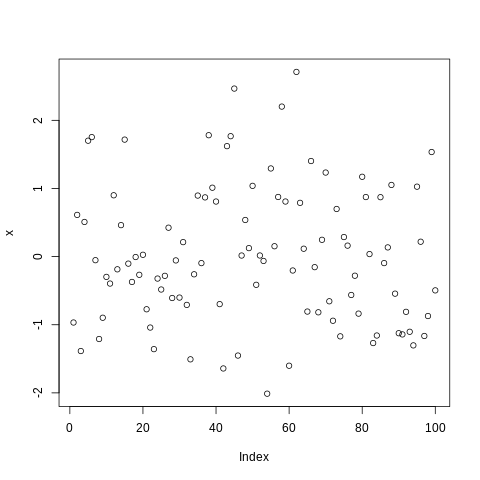

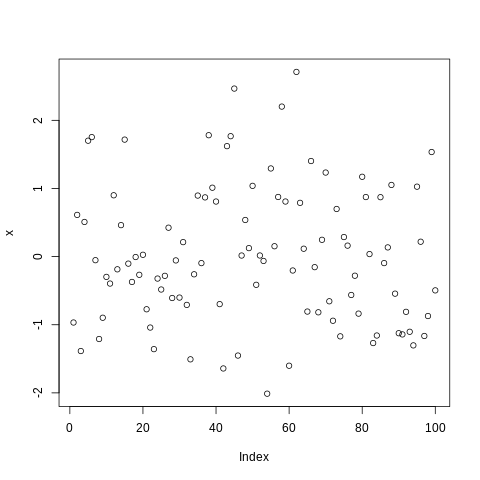

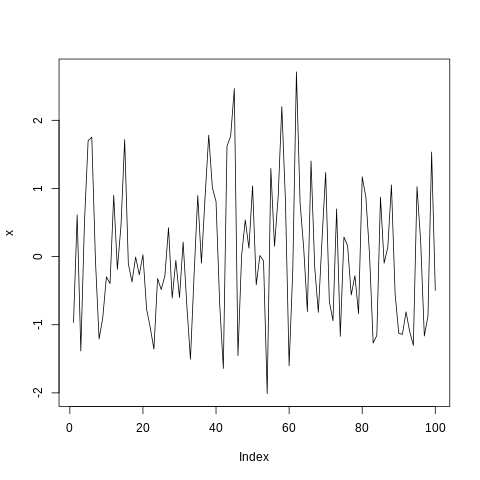

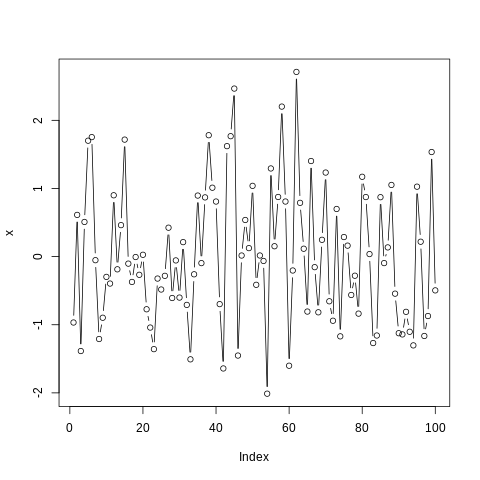

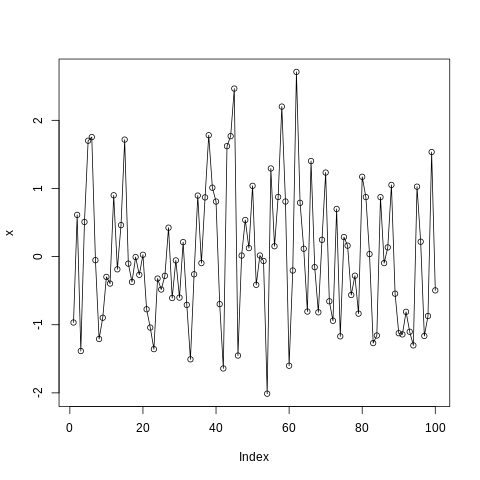

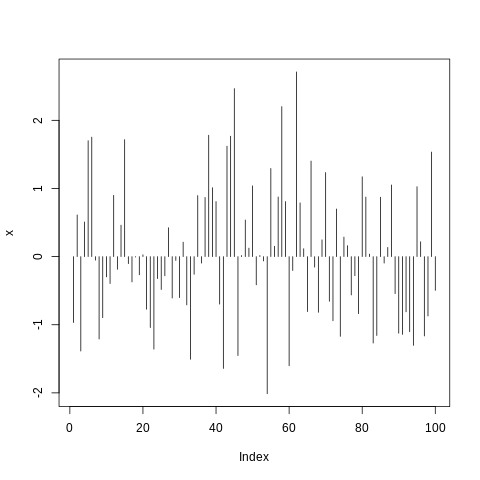

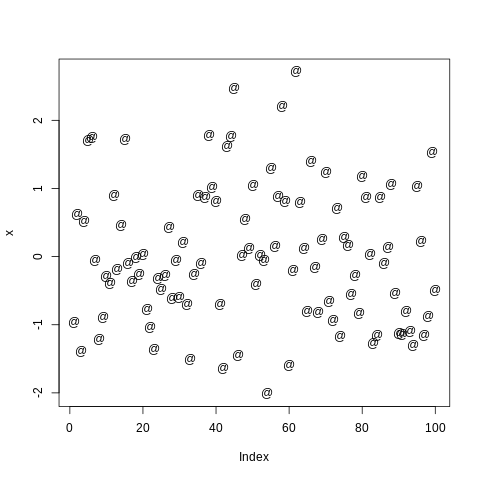

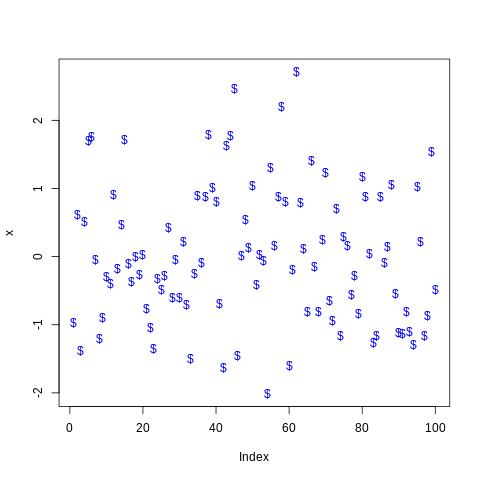

In [16]:
%%R
# plot  points  lines
x <- rnorm(100,0,1) # Simulando 100 observaciones de una v.a. Normal(0,1)
print(head(x))
plot(x)

# < 001 >
plot(x,type="p") # Lo mismo que plot(x), type="p" es por default

# < 002 >
plot(x,type="l") # Con líneas

# < 003 >
plot(x,type="b") # Puntos y líneas (no me gusta)

# < 004 >
# Un mejor estilo de puntos y líneas:
plot(x)  # Colocamos los puntos
lines(x) # Los unimos con líneas

# < 005 >
plot(x,type="h") # Con líneas verticales

# < 006 >
plot(x,pch="@")  # Con caracteres especiales

# < 007 > 
plot(x,pch="$",lwd=3,col="blue") # Color y mayor grosor


Catálogo de colores

In [14]:
%%R
# El catálogo de colores puede consultarse con:
colors()


  [1] "white"                "aliceblue"            "antiquewhite"        
  [4] "antiquewhite1"        "antiquewhite2"        "antiquewhite3"       
  [7] "antiquewhite4"        "aquamarine"           "aquamarine1"         
 [10] "aquamarine2"          "aquamarine3"          "aquamarine4"         
 [13] "azure"                "azure1"               "azure2"              
 [16] "azure3"               "azure4"               "beige"               
 [19] "bisque"               "bisque1"              "bisque2"             
 [22] "bisque3"              "bisque4"              "black"               
 [25] "blanchedalmond"       "blue"                 "blue1"               
 [28] "blue2"                "blue3"                "blue4"               
 [31] "blueviolet"           "brown"                "brown1"              
 [34] "brown2"               "brown3"               "brown4"              
 [37] "burlywood"            "burlywood1"           "burlywood2"          
 [40] "burlywood3"       

Detalles de función plot: 

In [41]:
%%R
?plot

R Help on ‘plot’plot                 package:graphics                  R Documentation

_G_e_n_e_r_i_c _X-_Y _P_l_o_t_t_i_n_g

_D_e_s_c_r_i_p_t_i_o_n:

     Generic function for plotting of R objects.  For more details
     about the graphical parameter arguments, see ‘par’.

     For simple scatter plots, ‘plot.default’ will be used.  However,
     there are ‘plot’ methods for many R objects, including
     ‘function’s, ‘data.frame’s, ‘density’ objects, etc.  Use
     ‘methods(plot)’ and the documentation for these.

_U_s_a_g_e:

     plot(x, y, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: the coordinates of points in the plot. Alternatively, a
          single plotting structure, function or _any R object with a
          ‘plot’ method_ can be provided.

       y: the y coordinates of points in the plot, _optional_ if ‘x’ is
          an appropriate structure.

     ...: Arguments to be passed to methods, such as graphical
          parameters (

### Histogramas

In [19]:
%%R
?hist

R Help on ‘hist’hist                 package:graphics                  R Documentation

_H_i_s_t_o_g_r_a_m_s

_D_e_s_c_r_i_p_t_i_o_n:

     The generic function ‘hist’ computes a histogram of the given data
     values.  If ‘plot = TRUE’, the resulting object of class
     ‘"histogram"’ is plotted by ‘plot.histogram’, before it is
     returned.

_U_s_a_g_e:

     hist(x, ...)
     
     ## Default S3 method:
     hist(x, breaks = "Sturges",
          freq = NULL, probability = !freq,
          include.lowest = TRUE, right = TRUE,
          density = NULL, angle = 45, col = NULL, border = NULL,
          main = paste("Histogram of" , xname),
          xlim = range(breaks), ylim = NULL,
          xlab = xname, ylab,
          axes = TRUE, plot = TRUE, labels = FALSE,
          nclass = NULL, warn.unused = TRUE, ...)
     
_A_r_g_u_m_e_n_t_s:

       x: a vector of values for which the histogram is desired.

  breaks: one of:

            • a vector giv

Gráfico de histogramas

$breaks
[1] -0.04 -0.03 -0.02 -0.01  0.00  0.01  0.02  0.03

$counts
[1]  1  4 12 14 20  7  7

$density
[1]  1.538462  6.153846 18.461538 21.538462 30.769231 10.769231 10.769231

$mids
[1] -0.035 -0.025 -0.015 -0.005  0.005  0.015  0.025

$xname
[1] "x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"
[1]  1  4 12 14 20  7  7
[1] 0.01538462 0.06153846 0.18461538 0.21538462 0.30769231 0.10769231 0.10769231
$names
[1] "breaks"   "counts"   "density"  "mids"     "xname"    "equidist"

$class
[1] "histogram"



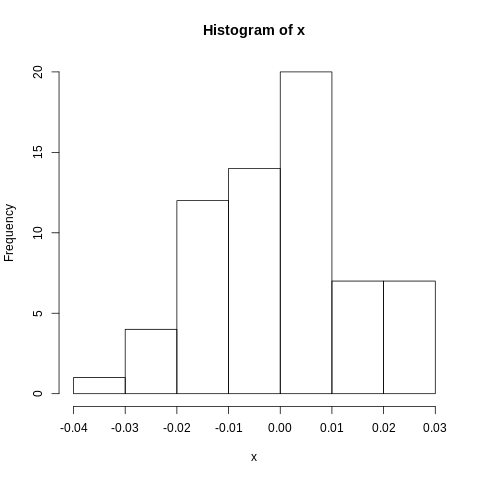

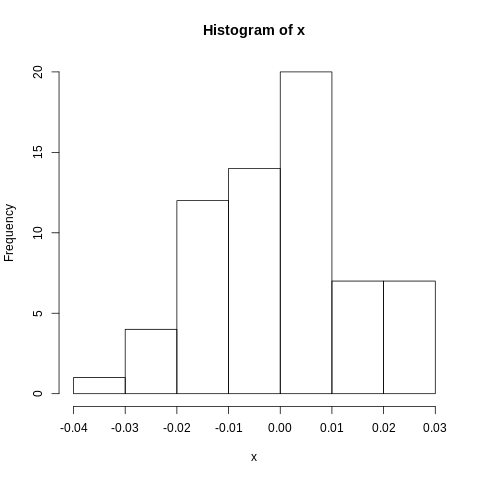

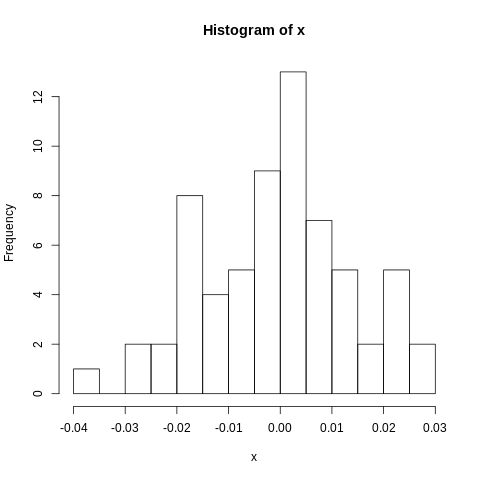

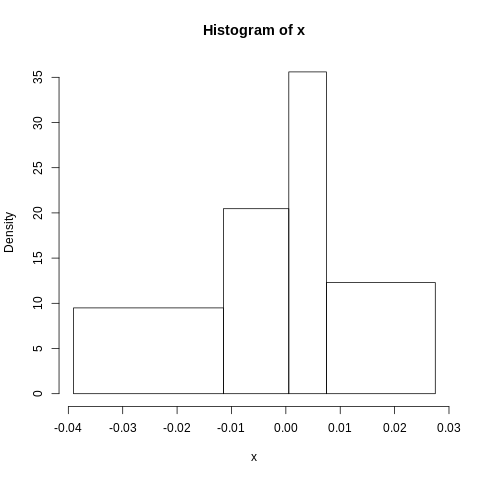

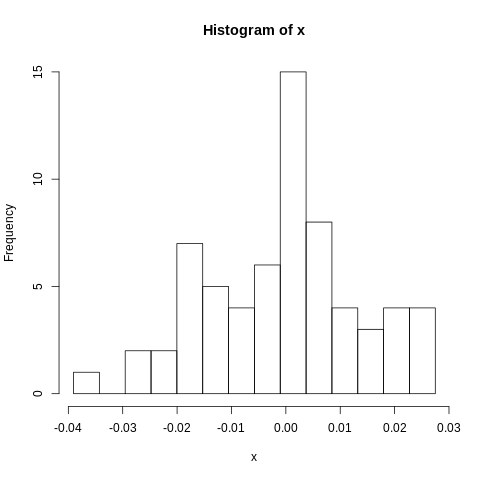

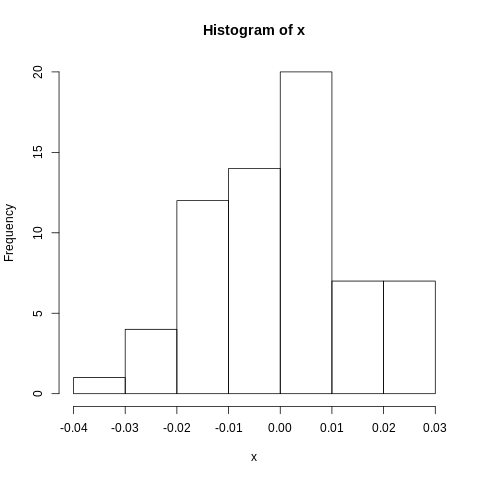

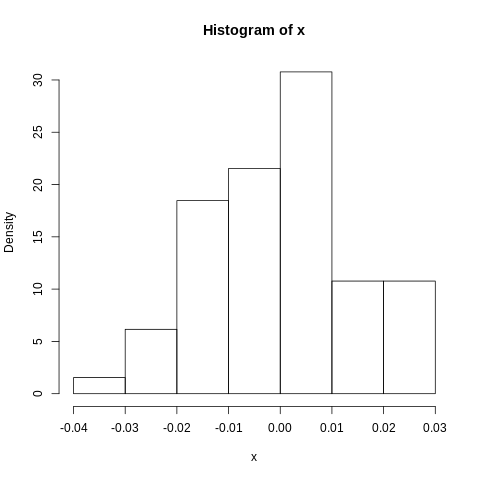

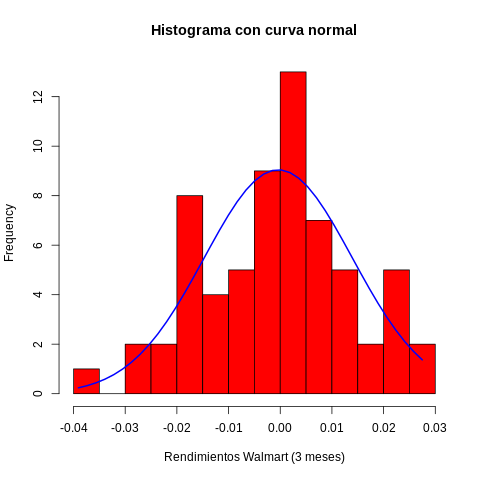

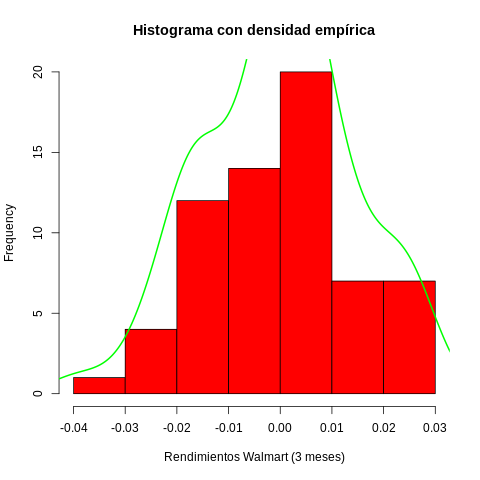

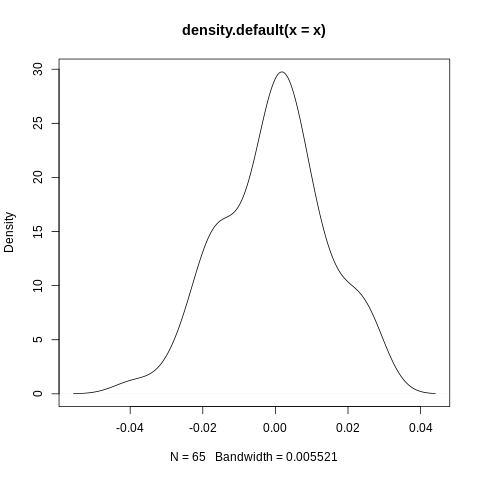

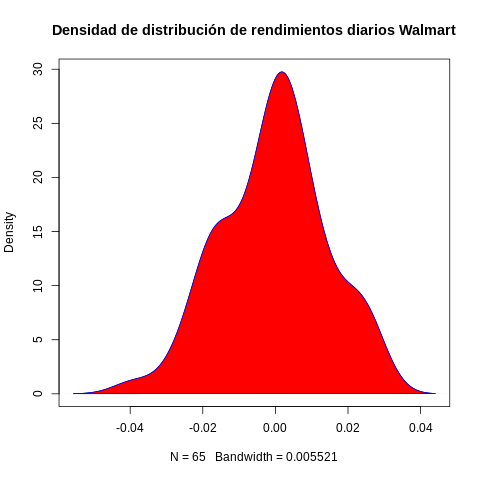

In [90]:
%%R

x=Datos$delta
hist(x)

# Pudiera ser necesario utilizar en el menú > Ventanas,
# para cambiar de la línea de comandos al gráfico y viceversa.
# Por default, el número de clases se determina con base en el
# algoritmo de Sturges.


# < 012 > 

hist(x,breaks=5)   # Forzamos el histograma a tener 5-1=4 clases


# < 013 >

hist(x,breaks=10)  # Forzamos el histograma a tener 10-1=9 clases


# < 014 >

b <- c(min(x),quantile(x,0.25),median(x),quantile(x,0.75),max(x))

hist(x,breaks=b)  # Usamos elementos del vector b como separadores de clase

# Se habrá generado un aviso de error porque hay valores fuera del rango
# de -2 a 3, eso lo podemos evitar usando summary:


# < 015 >


# < 016 >

# También la función seq es útil para generar separadores de clase:

#print(seq(from=min(x),to=max(x),by=0.01)) # Sólo para recordar lo que genera

hist(x,breaks=seq(from=min(x),to=max(x),length=15))

# < 018 >

# Histograma de frecuencias, cada barra representa conteo de puntos por clase:

hist(x,freq=T)


# < 019 >

# Pero si se desea un ajuste para que la suma de las áreas de las barras sea
# igual a 1 (y poder compararlo versus alguna densidad teórica) entonces:

hist(x,freq=F)


# < 020 >

# Y le agregamos la gráfica de la función de densidad de la cual se simularon
# los datos, que fue una v.a. Normal(0,1):
h<-hist(x, breaks=10, col="red", xlab="Rendimientos Walmart (3 meses)",
   main="Histograma con curva normal")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
# < 021 >

hist(x, breaks=5, col="red", xlab="Rendimientos Walmart (3 meses)",
   main="Histograma con densidad empírica")
lines(density(x), # density plot
 lwd = 2, # thickness of line
 col = "Green")


# Si en lugar del gráfico del histograma, queremos los datos con los que se
# construye, entonces:

print(hist(x,plot=F))

# que como podrá notar es un objeto que despliega información como una lista.
# Por ejemplo, si sólo deseamos los conteos por clase:

print(hist(x,plot=F)$counts)

# Frecuencias relativas:

print(hist(x,plot=F)$counts/length(x))


#Densidad

# Gráfica de densidad
d <- density(x)
plot(d, main="Densidad de distribución de rendimientos diarios Walmart")
polygon(d, col="red", border="blue")

# < 022 >

# Clase y modo de un histograma:

histograma <- hist(x,plot=F)

class(histograma)

mode(histograma)

attributes(histograma)



### Gráficos avanzados

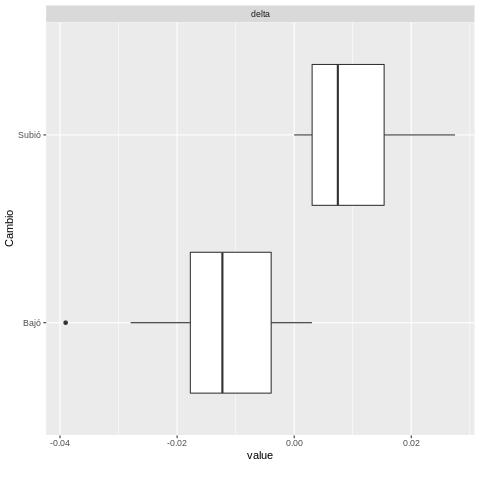

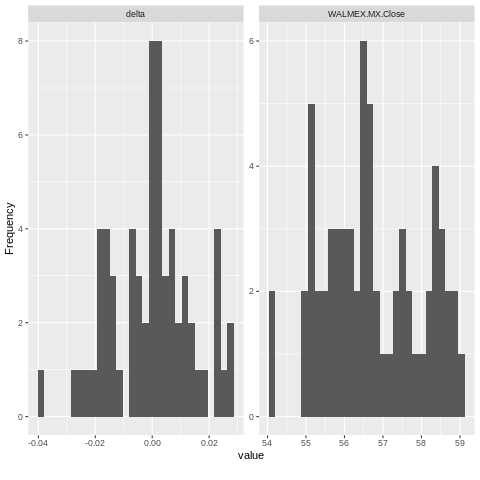

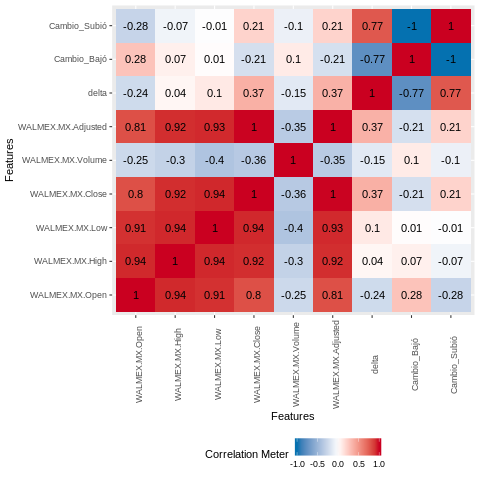

In [101]:
%%R
plot_boxplot(Datos[c("delta","Cambio")], by = 'Cambio')
#introduce(iris)
#head(iris)
plot_histogram(Datos[c("WALMEX.MX.Close","delta")])

##Correlaciones bivariadas

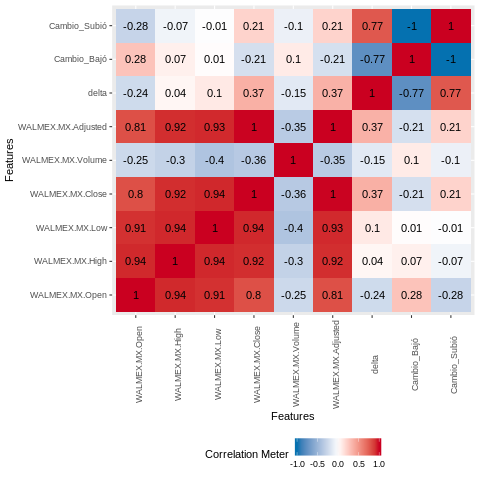

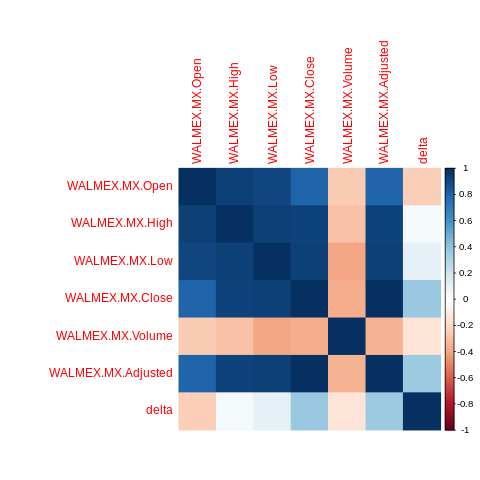

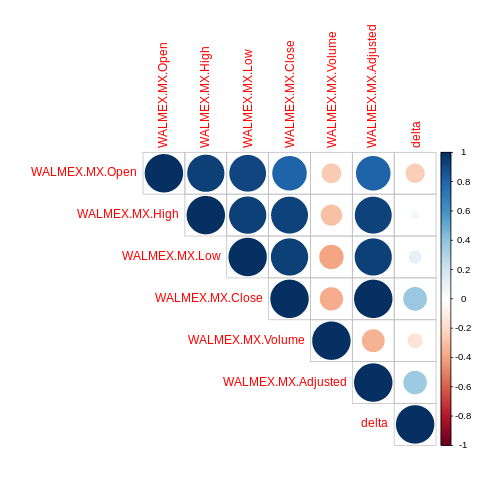

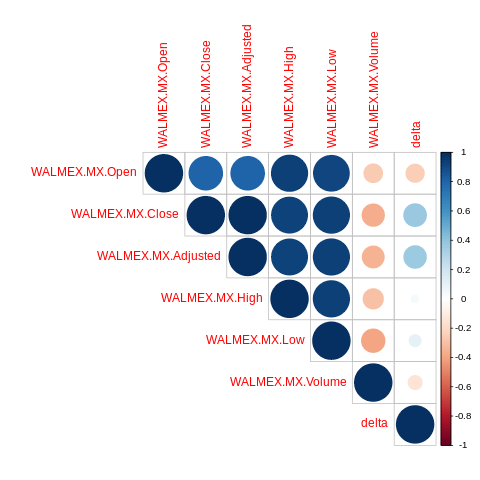

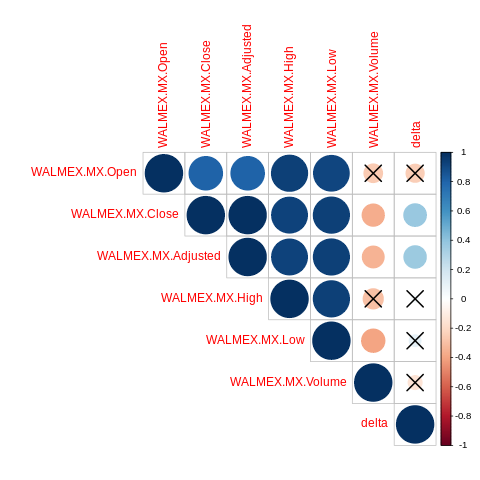

In [122]:
%%R
plot_correlation(Datos, cor_args = list("use" = "pairwise.complete.obs"))
M=cor(subset(Datos, select = -c(Cambio) ))
#mapa de calor
corrplot(M, method="color")
#Correlación triangular
corrplot(M, type="upper")
#Correlación agrupada
corrplot(M, type="upper", order="hclust")

#calcular la significancia de correlación
cor.mtest <- function(mat, ...) {
    mat <- as.matrix(mat)
    n <- ncol(mat)
    p.mat<- matrix(NA, n, n)
    diag(p.mat) <- 0
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            tmp <- cor.test(mat[, i], mat[, j], ...)
            p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
        }
    }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
# matrix of the p-value of the correlation
p.mat <- cor.mtest(subset(Datos, select = -c(Cambio) ))

corrplot(M, type="upper", order="hclust", 
         p.mat = p.mat, sig.level = 0.01)